In [2]:
###importaciones
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import joblib

In [3]:
##lectura del csv y objetos a usar
data=pd.read_csv("Decapado.csv")
le=LabelEncoder()
dt=DecisionTreeClassifier()
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,ACEROOrigen,C_ACEROOrigen,NECESIDAD_DESTINO,ACERODestino,C_ACERODestino,PRO_ORIGEN,...,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion,Pedido
0,OK,27-07-2016 10:36:54,2A318465GM200,3001014323,ACE520,CS,3001178885,ACE520,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
1,OK,22-12-2016 11:34:24,2A397918GD300,3001252680,ACE520,CS,3001337015,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
2,OK,22-12-2016 11:34:23,2A397918GD300,3001252680,ACE520,CS,3001337015,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
3,OK,17-10-2017 03:31:38,2A448115UD100,3001395287,ACE520,CS,3001621725,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
4,OK,02-08-2016 15:45:11,2A375091GD200,3001187294,2060,CS,3001206107,ACE033,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,Rechazado,24-03-2017 16:41:25,3A599109CD300,3001392804,06BTEP,DQ,3001324343,A05BC2,CS,MP530337,...,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,Rechazado,1
10724,Rechazado,09-06-2016 19:37:32,2A360053GS100,3001130070,ACE510,CS,3001163404,7094,HS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
10725,OK,07-03-2016 17:47:56,2A287085GD302,3000969382,7094,HS,3001077256,ACE510,CS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
10726,Rechazado,09-06-2016 19:37:34,2A360047GS100,3001130070,ACE510,CS,3001163404,7094,HS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1


In [4]:
###limpieza de datos
de=['Estatus', 'FECHA_ALTA', 'IdMaterial', 'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 'PRO_DESTINO', 'Pedido','CCLASEPRODTODestino','CCLASEPRODTOOrigen','ACEITADODestino','ACEITADOOrigen','C_ACERODestino','C_ACEROOrigen','CCLASEPRODTODestino','CCLASEPRODTOOrigen']
datac=data.drop(de,axis=1)
datac

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,ACE520,ACE520,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
1,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
2,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
3,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
4,2060,ACE033,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,06BTEP,A05BC2,LAMINACION,610,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,Rechazado
10724,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
10725,7094,ACE510,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
10726,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado


In [5]:
main_df=datac
main_df=pd.DataFrame(data=main_df)
full_df=datac
full_df=pd.DataFrame(data=full_df)
print(full_df.head(10))

  ACEROOrigen ACERODestino BORDESOrigen  DIAM__INTERNOOrigen  \
0      ACE520       ACE520     CORTADOS                  610   
1      ACE520         2060     CORTADOS                  610   
2      ACE520         2060     CORTADOS                  610   
3      ACE520         2060     CORTADOS                  610   
4        2060       ACE033     CORTADOS                  610   
5        2060       ACE520     CORTADOS                  610   
6        2060       ACE520     CORTADOS                  610   
7        2060       ACE520     CORTADOS                  610   
8      C071TM       ACE001     CORTADOS                  610   
9      ACE520       ACE033     CORTADOS                  610   

            EXTREMOSOrigen                    NORMAOrigen   NORTOLANCHOOrigen  \
0  CORTADOS 98% EN ESPESOR  TER \ 1006 GAL (V 2011 REV 1)  ASTM A 568 / A 635   
1  CORTADOS 98% EN ESPESOR  TER \ 1006 GAL (V 2011 REV 1)  ASTM A 568 / A 635   
2  CORTADOS 98% EN ESPESOR  TER \ 1006 GAL (V 2011 R

In [6]:
main_df.columns

Index(['ACEROOrigen', 'ACERODestino', 'BORDESOrigen', 'DIAM__INTERNOOrigen',
       'EXTREMOSOrigen', 'NORMAOrigen', 'NORTOLANCHOOrigen',
       'NORTOLESPESOROrigen', 'PLANITUDOrigen', 'SOLDAOrigen',
       'SUPERFICIEOrigen', 'USOGRALOrigen', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino', 'Reasignacion'],
      dtype='object')

In [7]:
###codificación de variable objetivo usando LE
main_df.Reasignacion=le.fit_transform(main_df['Reasignacion'])
main_df

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,ACE520,ACE520,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
1,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
2,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
3,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
4,2060,ACE033,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,06BTEP,A05BC2,LAMINACION,610,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,1
10724,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1
10725,7094,ACE510,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1
10726,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,...,610,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1


In [8]:
###Variable objetivo
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

       Reasignacion
7382              0
8116              0
3491              0
7488              0
10365             1
3104              0
9629              0
4525              0
9946              0
9571              0


In [9]:
main_df=main_df.drop(['Reasignacion'],axis=1)

In [10]:
####encodifiación de atributos usando target
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['ACEROOrigen', 'ACERODestino', 'BORDESOrigen', 'DIAM__INTERNOOrigen',
       'EXTREMOSOrigen', 'NORMAOrigen', 'NORTOLANCHOOrigen',
       'NORTOLESPESOROrigen', 'PLANITUDOrigen', 'SOLDAOrigen',
       'SUPERFICIEOrigen', 'USOGRALOrigen', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino'],drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [39]:
joblib.dump(enc,'TargetDecapado.pkl')

['TargetDecapado.pkl']

In [11]:
codi=enc.transform(main_df)
codi

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.022785,0.021277,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
1,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
2,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
3,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
4,0.075472,0.000000,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0.193548,0.387755,0.109991,0.102066,0.102629,0.021505,0.102915,0.094607,0.021739,0.102629,...,0.110524,0.101162,0.102629,0.042105,0.104265,0.091111,0.042105,0.102629,0.123091,0.037594
10724,0.542683,0.250000,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10725,0.100000,0.404762,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10726,0.542683,0.250000,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624


In [12]:
###declaración de variable x (atributos)
X=codi
X

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.022785,0.021277,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
1,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
2,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
3,0.022785,0.061381,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
4,0.075472,0.000000,0.091105,0.102066,0.102629,0.020805,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.048507,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0.193548,0.387755,0.109991,0.102066,0.102629,0.021505,0.102915,0.094607,0.021739,0.102629,...,0.110524,0.101162,0.102629,0.042105,0.104265,0.091111,0.042105,0.102629,0.123091,0.037594
10724,0.542683,0.250000,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10725,0.100000,0.404762,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10726,0.542683,0.250000,0.091105,0.102066,0.102629,0.333333,0.102915,0.094607,0.103328,0.102629,...,0.089890,0.101162,0.102629,0.333333,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624


In [13]:
###declaración de y (objetivo)
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
10723,1
10724,1
10725,1
10726,1


In [20]:
##división de datos 
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [21]:
##entrenamiento
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
###prueba score
dt.score(X_test,y_test)

0.9623415361670395

In [20]:
joblib.dump(dt,'ModeloDecapado.pkl')

['ModeloDecapado.pkl']

In [21]:
nombres=['OK','RECHAZADO']

In [22]:
##exportación y render
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)
graph.render('ModeloDecapado')

'ModeloDecapado.pdf'

Text(0.5, 0, 'Importancia')

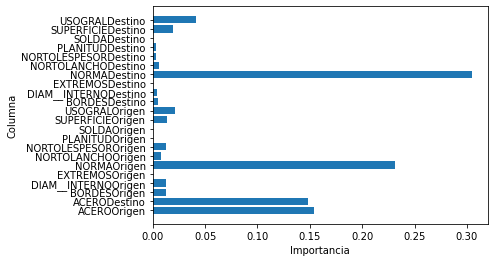

In [23]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')